**Para entender mejor el tipo `static`: https://beginnersbook.com/2013/05/static-variable/**

# Java

* Java compila a traves de JVM (Java Virtual Machine)
* Para compilar se utiliza el comando: `javac hola.java` (Esto crea el archivo `.bin`)
* Para ejecutar se usa: `java hola`

# Hola Mundo

```java
public class HelloWorld{
  public static void main(String[] args){
    System.out.println("Hello World");
  }
}
```

Lo que se crea es una clase con el nombre HelloWorld en la cual existe una funcion main, funcion principal que se ejecutará, esta debe poseer siempre la misma plantilla (por ahora):
```java
public static void main(String[] args)
```
* `public`: indica que la funcion/clase es publica, es decir, se puede acceder desde otros archivos
* `static`: con esto no es necesario declarar un objeto asociado a la clase para llamarlo, es decir, se va a llamar desde afuera del programa 
* `void`: Tipo que retorna la funcion, en este caso no retorna nada
* `String[]`: Arreglo de strings

**La funcion `main` debe estar en una sola clase, que usualmente es la clase principal**

# Metodos para clases

## Ejemplo Neurona

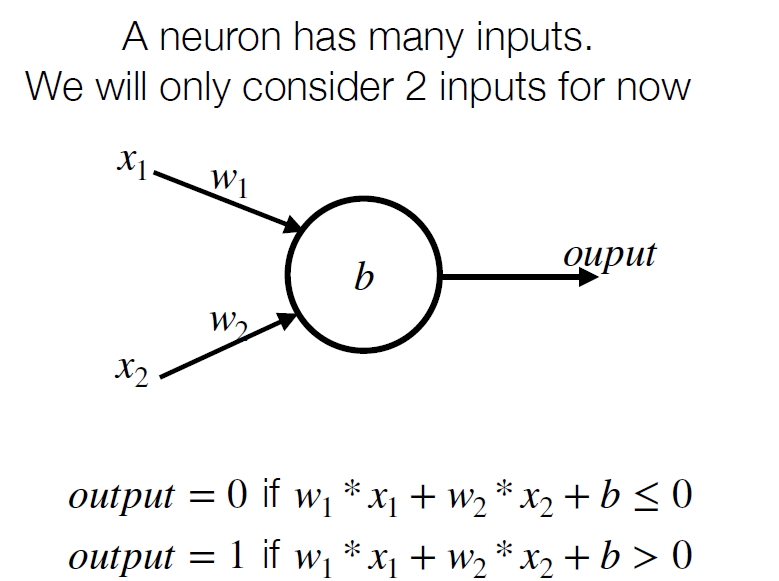





Empezaremos a crear una clase llamada Neuron, y definiremos tres variables de instancias: $w_1, w_2, b$. Ademas, tendremos dos metodos para esta clase: `computeZ` que calculara el valor intermedio $z$ y `feed` que retornara el valor de salida.

El codigo seria:
```java
public class Neuron{
  private double weight1, weight2;
  private double bias;

  public Neuron(double w1, double w2, double b){
    weight1 = w1;
    weight2 = w2;
    bias = b;
  }

  public double computeZ(double input1, double input2){
    return input1*weight1 + input2*weight2 + bias;
  }

  public double feed(double input1, double input2){
    double z = this.computeZ(input1, input2);
    if (z<=0) return 0;
    else return 1;
  }
}
```
Observaciones:
* Comunmente las variables de instancias deben ser privadas, es decir se debe declarar como `private`, esto implica que solo son conocidas por la clase y sus metodos, esto ultimo no es totalmente corrector pues las variables de instancias solo son reconocidas por el constructor, si estas no se asignan, entonces los metodos de la clase no lo reconoceran

* En el constructor se asignan las variables de instancias, es importante que el nombre de la funcion sea el mismo que el de la clase pues en caso contrario no compila. El contructor estara encargado de crear los objetos por tanto la funcion no retorna

* Para llamar a otros metodos que se encuentran en la misma clase desde un metodo se debe anteponer `this.metodo`, esto es opcional pero es mejor anteponerlo, mas adelante se verá la razon, la cual tiene relacion con herencia de clases 

* Tanto metodos como variables pueden ser llamados por instancias de clases a traves de `object.method` o `object.var` respectivamente (`object` es el objeto creado al instanciar la clase)
Ahora para testear el programa creamos otra clase que se encarge de este test, es decir, necesitaremos crear una funcion main:
```java
public class NeuronExample{
  public static void main(String[] args){
    Neuron or = new Neuron(1.0, 1.0, -0.5);
    System.out.println("0 OR 0" + or.feed(0,0));
    System.out.println("1 OR 0" + or.feed(1,0));
  }
}
```

* `println`: convierte a `String` cualquier valor para poder concatenarlo
* NeuronExample le envia ordenes a `or` definidos en terminos de **mensajes**, los cuales deben ser compendidos por este, es decir, no se pueden enviar mensajes que no sean entendidos por este objeto

**En el caso de metodos estaticos (`static`), estos no son vistos por la clase, solo son vistos los instance methods que no son privados. Por ejemplo, el metodo `main` es llamado directamente por la JVM sin instanciar un objeto de la clase en donde se encuentre (se llama `NombreClase.main()`). Por otra parte, si una variable es estatica, implica que el sector de memoria es exactamente el mismo para este y para cualquier variable a la cual se le asigne esta variable estatica**


# Herencia de clases

## Ejemplo ReluNeuron

Esta neurona es un poco diferente, el valor de Z calculado es el mismo, sin embargo la salida no. Notar que esta clase ReluNeuron no puede usar el metodo or de Neuron que definimos para la clase anterior. Para esto debe existir Herencia, para lo cual se realiza la siguiente implementacion:

```java
public class ReluNeuron extends Neuron {
  public ReluNeuron(double w1, double w2, double b){
    super(w1,w2,b);
  }

  public double feed(double input1, double input2){
    double z = this.computeZ(input1, input2);
    return (z>0) ? z:0;
  }
}
```

Observaciones:
* La clase ReluNeuron extiende la clase Neuron, para esto se llama el constructor de la clase base a traves de la llamada `super()` pasando las variables de instanciacion para inicializar ReluNeuron

* Como queremos redifinir `feed`, el metodo debe volver a crearse. Sin embargo, debe tener la misma **firma** que el metodo de la clase de la cual hereda, es decir, debe retornar el mismo tipo y recibir los mismos parametros.

# Esquema de Herencia de clases UML (Unified Modeling Languaje)

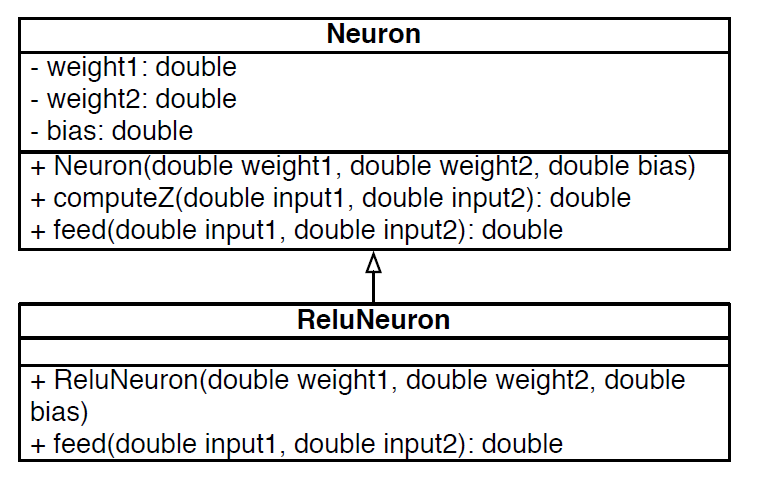

* La flecha con fondo blanco indica que la subclase ReluNeuron hereda de la clase Neuron

* Los simbolos $+$ indican que los parametros son publicos, los simbolos $-$ indica que los parametros son privados

* Los metodos de la clase superior son heredados hacia las subclases

* Aunque las variables de instancias de la clase Neuron son privadas, estas pueden ser inicializadas a traves del constructor en la subclase ReluNeuron

```java
public class ReluNeuron extends Neuron{
    public ReluNeuron(double w1, double w2, double b){
        super(w1,w2,b);
    }

    public double feed(double input1, double input2){
        double z = this.computeZ(input1, input2);
        return (z>0) ? z:0;
    }
}
```

## Casos Interesantes

Si creamos ciertos objetos, podemos realizar las siguientes relaciones:
```java
Neuron n = new Neuron(1,1,-0.5);
n.feed(1,1);
```
* Lo que se crea es un objeto de tipo `Neuron`, donde al llamar el metodo `feed`, este metodo es el asociado a la clase Neuron. Se ejecuta `Neuron.feed()`

```java
ReluNeuron n = new ReluNeuron(1,1,-0.5);
n.feed(1,1);
```
* Lo que se crea es un objeto de tipo `ReluNeuron`, que al llamar el metodo `feed`, este metodo es el asociado a la subclase ReluNeuron. Se ejecuta `ReluNeuron.feed()`

```java
Neuron n = new ReluNeuron(1,1,-05);
n.computeZ(1,1);
```
* En tiempo de compilacion, los metodos que son chequeados (por el compilador) son los metodos del tipo de la variable `n`, es decir, de la clase Neuron
* En tiempo de ejecucion, `n` se comportará como un objeto de tipo ReluNeuron que al llamar al metodo `computeZ`, lo buscará en esta subclase, sin embargo como no existe, seguirá la buscada en la clase padre, es decir en Neuron. Se ejecuta `Neuron.computeZ()`

**OBS:** A parte, el compilador chequea si la clase es subclase (o subclase de una subclase...) de la clase Neuron, pues en caso contrario no se podran utilizar los metodos heredados

```java
Neuron n = new ReluNeuron(1,1,-0.5);
n.feed(1,1);
```
* En tiempo de compilacion, el compilador chequea que en Neuron exista el metodo `feed`. Ve si la clase ReluNeuron es subclase de Neuron
* En tiempo de ejecucion, buscará el metodo en la clase ReluNeuron y como este existe se ejecuta `ReluNeuron.feed()`


# Terminologia

## Objeto

Un **objeto** comprende los mensajes por los metodos heredados y definidos de su clase. Tambien se puede ver como un coleccion de datos que tienen cierta relacion.
* Dos objetos pueden tener la misma informacion, atributos, sin embargo no por eso son iguales, solo en caso de que se alojen en el mismo sector de memoria se dirá que son iguales

## Clase

Una **clase** en principio se puede observar como una fabrica de objetos. Esta definido como un conjunto de declaraciones de variables y definiciones de metodos:
`class = name + variables + methods + superclass`

OBS: En java: `class = name + variables + methods + superclass + interfaces + static methods + ..`

## Metodo

Un **metodo** es un pedazo de codigo ejecutable, este termina cuando: 
* No existen mas instrucciones a ejecutar
* Se alcanza la declaracion `return`
* Se alcanza una exepcion

Se pueden acceder a las **pseudo-variables** `this` y `super` (solo en un metodo de instancia, no en metodos estaticos)

## Herencia/Subclases

Este procedimiento se utiliza cuando se requiere de la especializacion entre clases. Una subclase **hereda atributos** y **comportamiento** de la superclase.

**OBS:** Esta considerada un mal diseño de programacion utilizar herencia para reutilizar codigo

## Polimorfismo

Es la habilidad de que un tipo A parezca y sea usado como otro tipo B. El polimorfismo juega un rol importante entre el envio de mensajes e invocaciones de funciones. Ej:
```java
Neuron n = new ReluNeuron(1,1,-0.5);
```

## Polimorfismo Parametrico (Parametric Polymorphism)

Permite que una funcion o tipo de dato pueda ser escrito de manera genericamente, para asi poder manipular valores de manera uniforme sin depender de su tipo. Ej:
```java
ArrayList<Double> list = new ArrayList<Double>();
list.add(1.0);
list.add(2.0);
```
**OBS:** Java soporta solo una version debil del polimorfismo parametrico